## Checking the Inter-Rater data has been preprocessed correctly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from twaidata.MRI_preprep.io import load_nii_img
from twaidata.mri_dataset_directory_parsers.MSS3_multirater import MSS3MultiRaterDataParser
from twaidata.mri_dataset_directory_parsers.LBC_multirater import LBCMultiRaterDataParser
from tqdm import tqdm

In [2]:
img = load_nii_img("/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs/MSS3_ED_001_V3_T1.nii.gz")
# img = load_nii_img("/home/s2208943/MSS3_001/V1/MSS3_ED_001_V1_T1Wbrain.nii.gz")
# img = load_nii_img("/home/s2208943/ipdis/data/InterRater_data/LBC360007/LBC360007_1_T1brain_reg_T2.nii.gz")

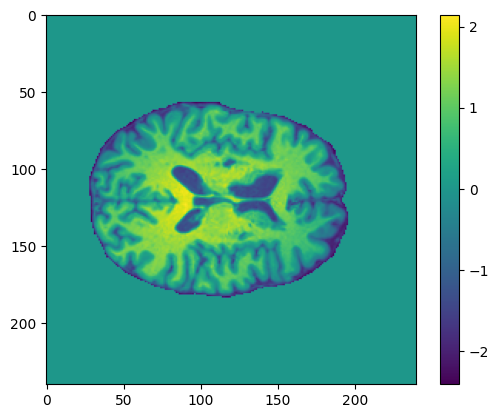

In [3]:
plt.imshow(img[0][:,:,30])
plt.colorbar()

In [4]:
parser = MSS3MultiRaterDataParser(
        # paths on the cluster for the in house data
        "/home/s2208943/ipdis/data/InterRater_data",
        "/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData"
    )
    
iomap = parser.get_dataset_inout_map()
for key, value in iomap.items():
    print("individual: ", key)
    print("individual map:", value)
    print(value.keys())
    break

individual:  MSS3_ED_025_V1
individual map: {'FLAIR': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_FLAIRbrain.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs', 'outfilename': 'MSS3_ED_025_V1_FLAIR', 'islabel': False}, 'wmhes': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_WMH_mask_ES.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/labels', 'outfilename': 'MSS3_ED_025_V1_wmhes', 'islabel': True}, 'lacune': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_lacunes.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/labels', 'outfilename': 'MSS3_ED_025_V1_lacune', 'islabel': True}, 'T1': {'infile': '/home/s2208943/ipdis/data/InterRater_data/MSS3_ED_025/V1/MSS3_ED_025_V1_T1Wbrain.nii.gz', 'outpath': '/home/s2208943/ipdis/data/preprocessed_data/MSS3_InterRaterData/imgs', 

In [4]:
from natsort import natsorted
def visualise_rater_files(name, filemap, colorbar=False):
    print("-------")
    print(name)
    num_imgs = len(filemap.keys())
    
    def get_img(key):
        try:
            return load_nii_img(os.path.join(filemap[key]['outpath'], filemap[key]['outfilename'] + ".nii.gz"))[0]
        except:
            print(f"failed for {key}")
            return None
    
    imgs = {key: get_img(key) for key in tqdm(natsorted(list(filemap.keys())))}
    
    fig, axs = plt.subplots(3, num_imgs, figsize=(20, 10))
    
    print(imgs.keys())
    # print(imgs)
    num_slices = imgs['FLAIR'].shape[-1]
    islices = [num_slices // 4, num_slices // 2, (num_slices // 4) * 3]
    for i in range(3):
        for j, key in enumerate(imgs.keys()):
            ax = axs[i][j]
            if imgs[key] is not None:
                im = ax.imshow(imgs[key][:,:,islices[i]], cmap='gray')
                if i == 0:
                    ax.set_title(key)
                if colorbar:
                    plt.colorbar(im, ax=ax)
                
    plt.show()
    plt.clf()

-------
MSS3_ED_025_V1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.28it/s]


dict_keys(['FLAIR', 'T1', 'lacune', 'wmhes', 'wmhmvh'])


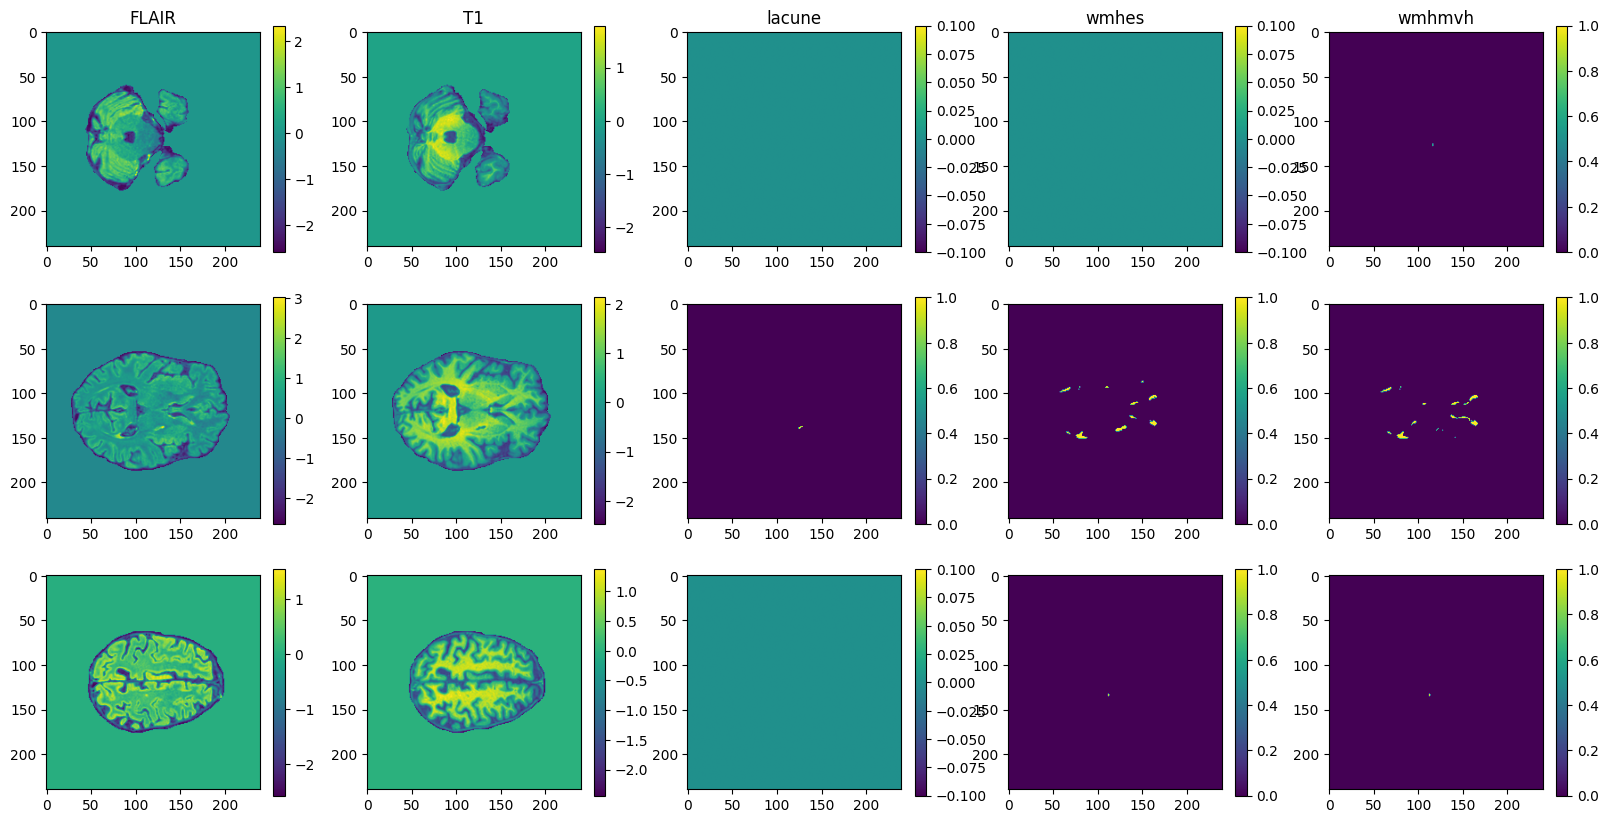

-------
MSS3_ED_017_V0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.24it/s]


dict_keys(['FLAIR', 'T1', 'wmhes', 'wmhmvh'])


<Figure size 640x480 with 0 Axes>

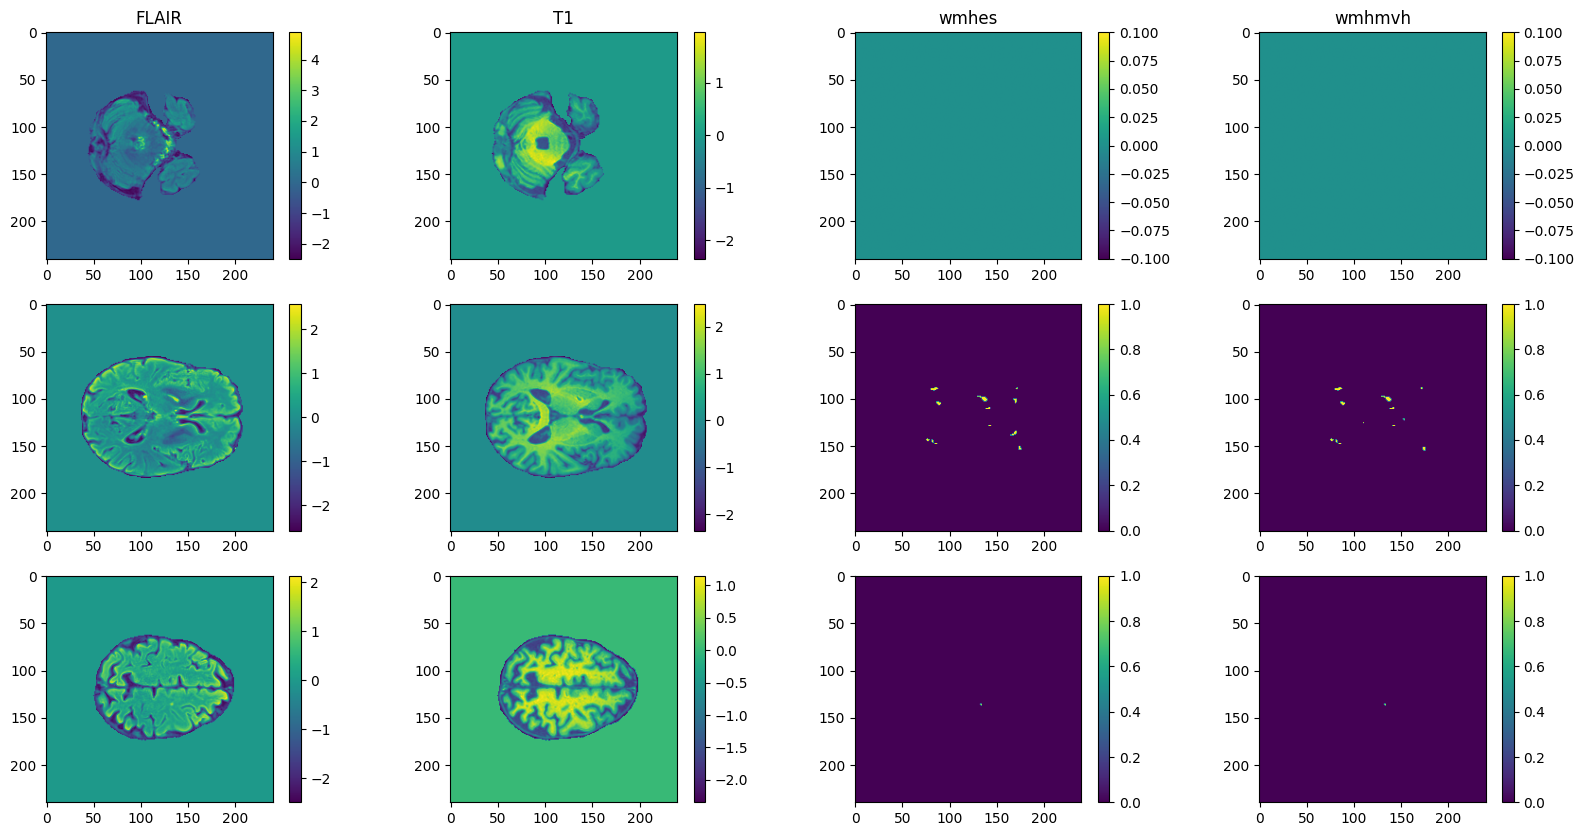

-------
MSS3_ED_017_V1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.91it/s]


dict_keys(['FLAIR', 'T1', 'lacune', 'wmhes', 'wmhmvh'])


<Figure size 640x480 with 0 Axes>

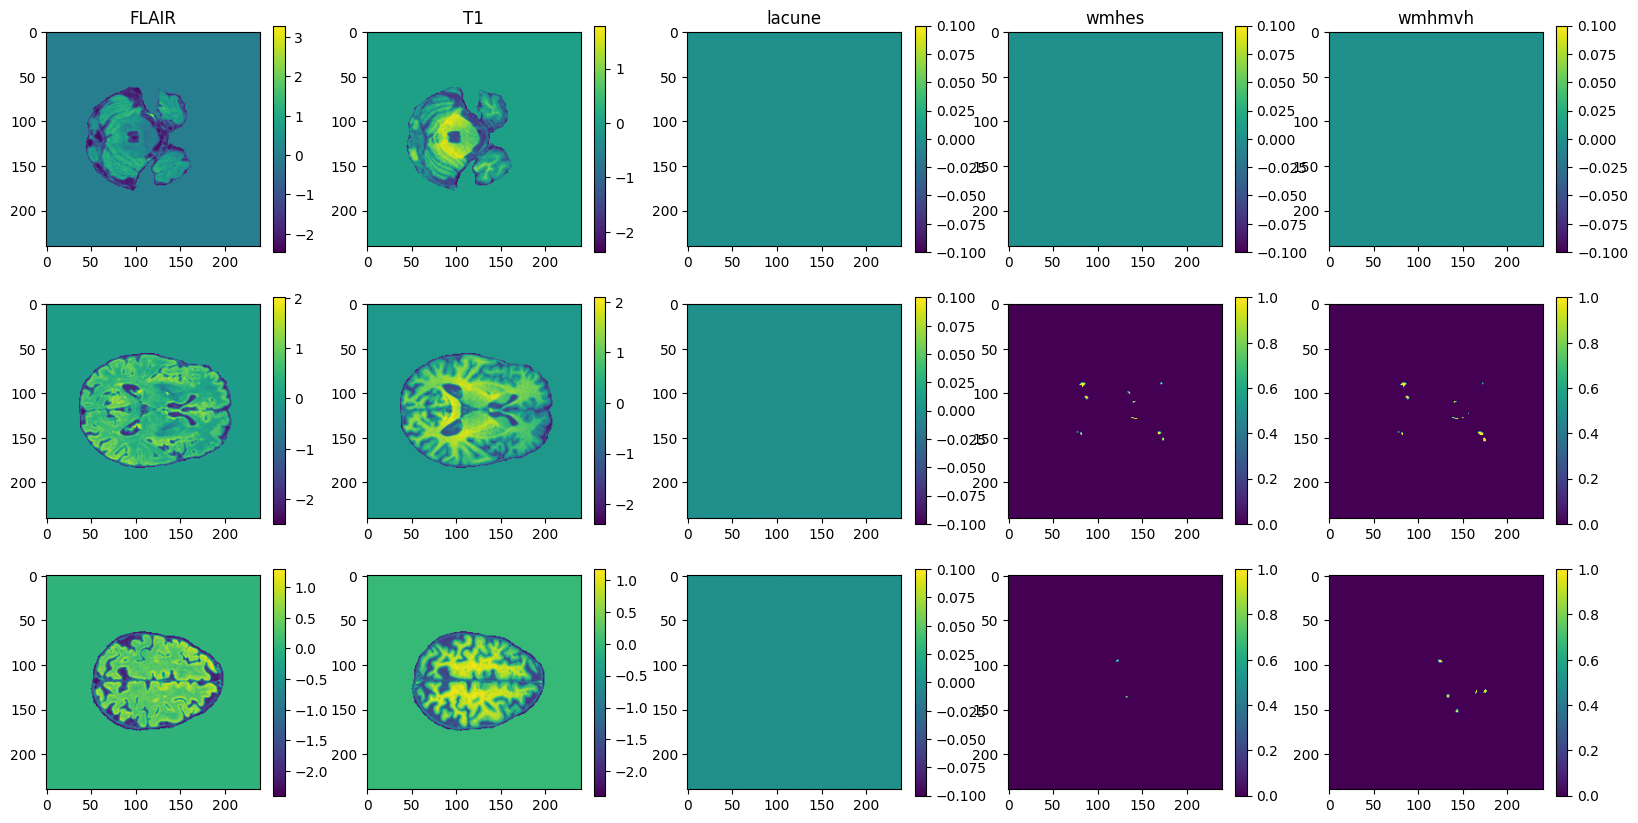

-------
MSS3_ED_036_V1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.89it/s]


dict_keys(['FLAIR', 'T1', 'wmhes', 'wmhmvh'])


<Figure size 640x480 with 0 Axes>

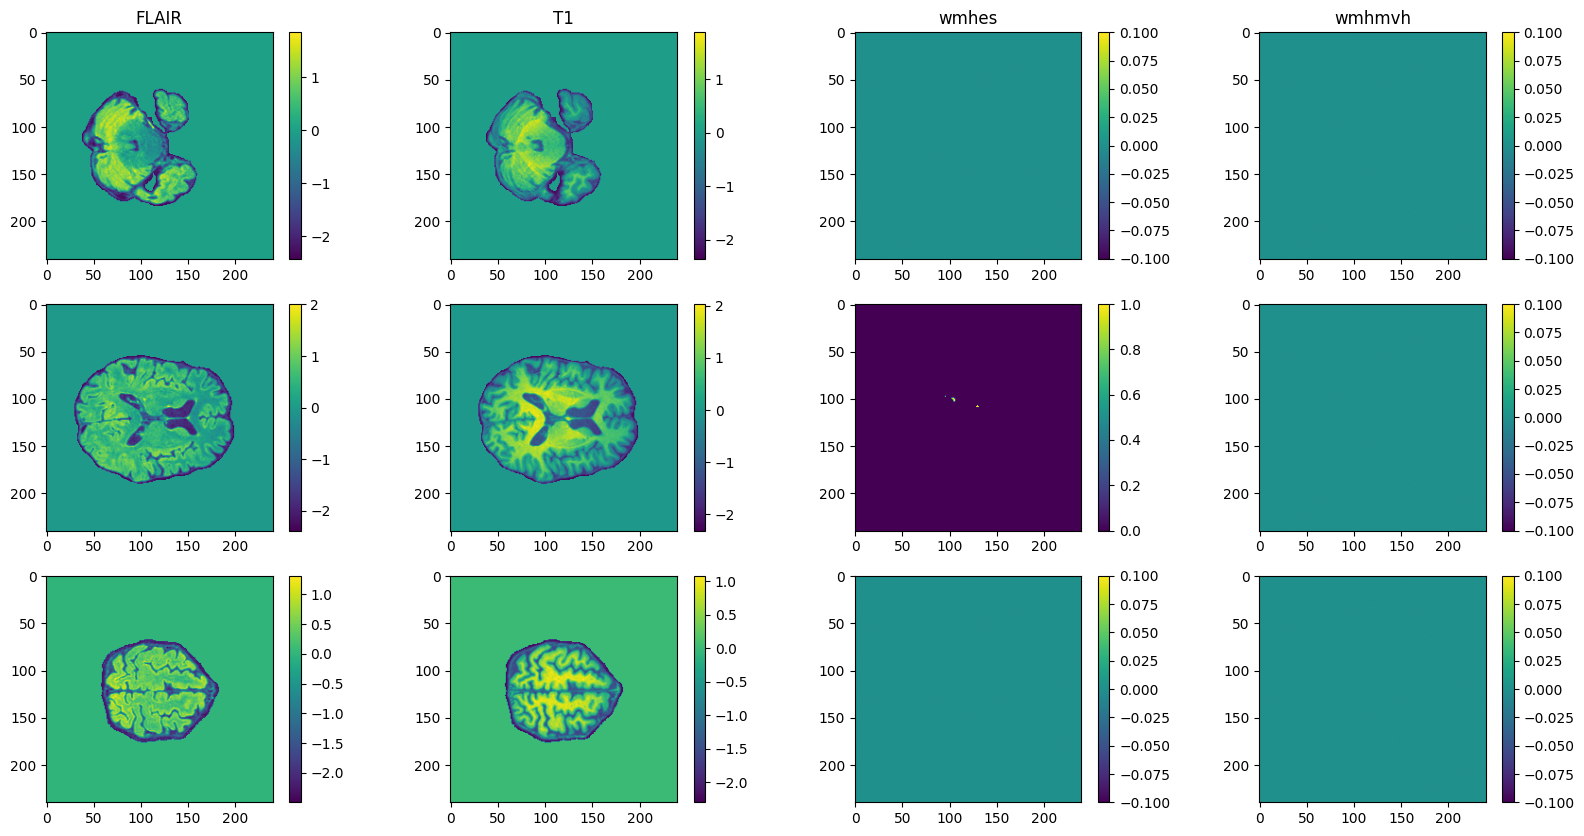

-------
MSS3_ED_041_V1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.68it/s]


dict_keys(['FLAIR', 'T1', 'wmhes', 'wmhmvh'])


<Figure size 640x480 with 0 Axes>

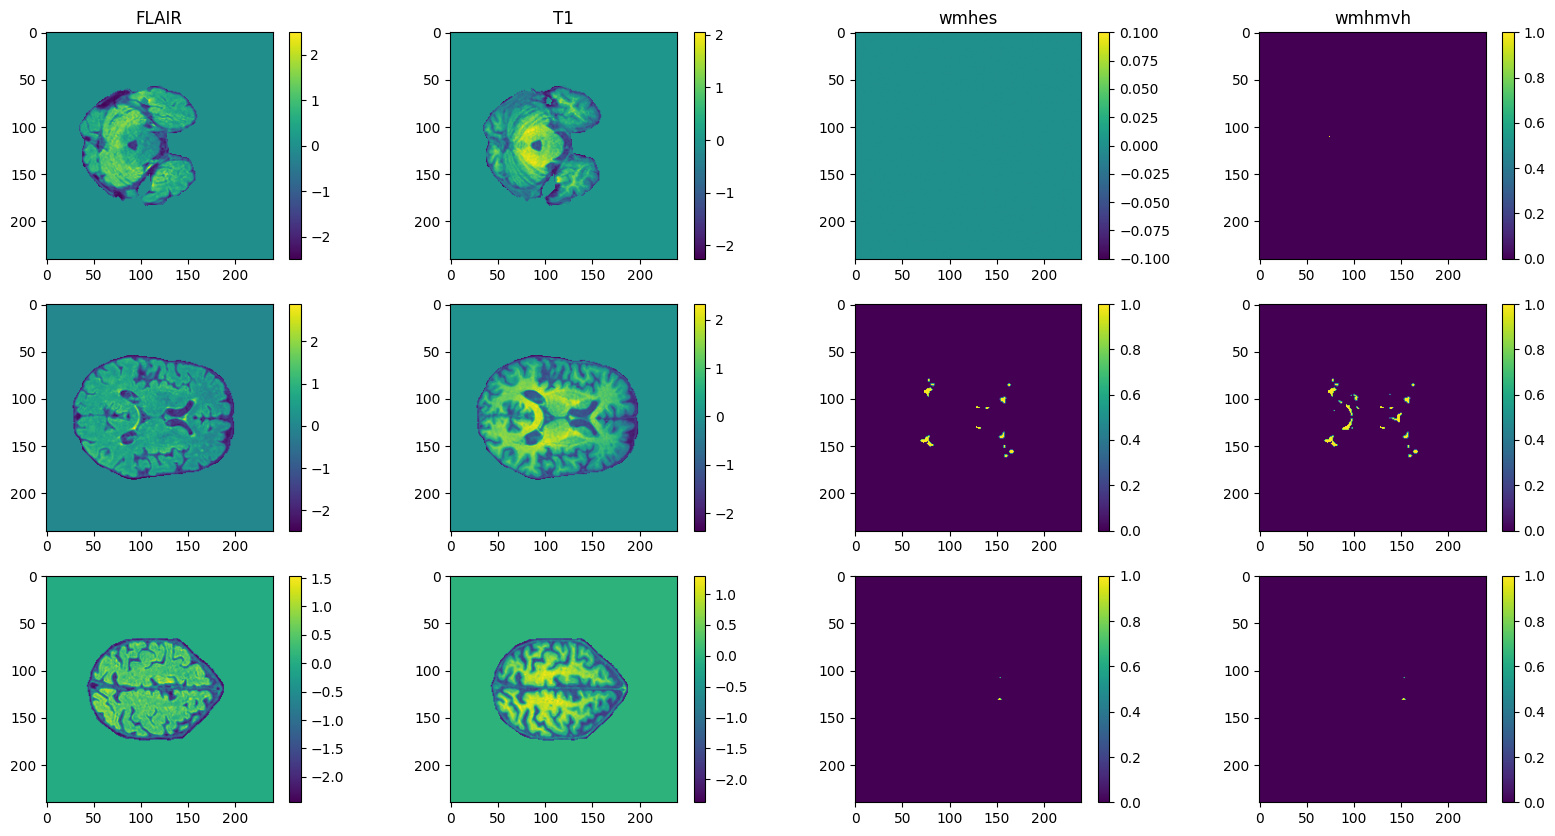

KeyboardInterrupt: Interrupted by user

<Figure size 640x480 with 0 Axes>

In [7]:
for ind, filemap in iomap.items():
    visualise_rater_files(ind, filemap, colorbar=True)
    input()

In [5]:
parser = LBCMultiRaterDataParser(
        # paths on the cluster for the in house data
        "/home/s2208943/ipdis/data/InterRater_data",
        "/home/s2208943/ipdis/data/preprocessed_data/LBC_InterRaterData"
    )
    
iomap = parser.get_dataset_inout_map()

-------
LBC1921_21746


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 15.98it/s]


dict_keys(['FLAIR', 'T1', 'wmh1', 'wmh2', 'wmh4', 'wmh5'])


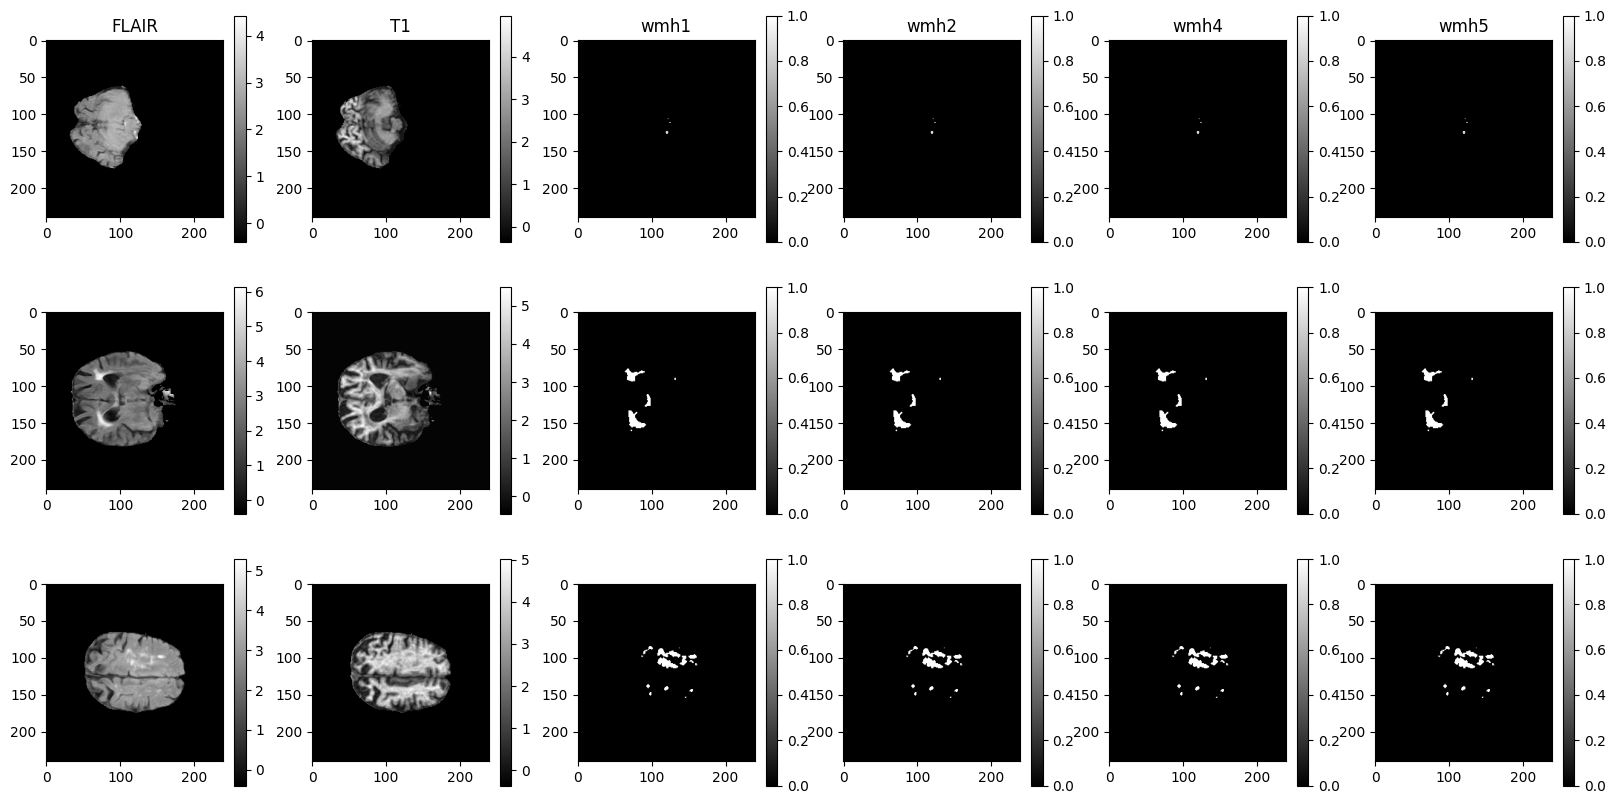

<Figure size 640x480 with 0 Axes>

In [6]:
for ind, filemap in iomap.items():
    try:
        visualise_rater_files(ind, filemap, colorbar=True)
    except:
        print(f"failed for {ind}")
        continue
    # input()
    break

In [ ]:
###